# DSC530 Week 6 Exercises

Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [2]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [3]:
import numpy as np


import thinkstats2
import thinkplot

## Exercise 7-1
Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

In [5]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [6]:
import first

live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

In [7]:
# Get the birth weight and the mother's age
weight, age = live.totalwgt_lb, live.agepreg
weight.sample(10), age.sample(10)

(7593     8.3750
 3999     6.9375
 9640     4.0625
 9485     6.0000
 13159    6.8125
 4085     7.1875
 2691     9.6875
 11286    9.1875
 4838     6.5000
 8926     7.3750
 Name: totalwgt_lb, dtype: float64,
 5324     24.41
 2603     27.91
 12368    29.83
 4653     15.33
 12470    35.25
 8139     24.16
 6249     26.66
 6761     25.33
 5337     28.25
 12856    27.50
 Name: agepreg, dtype: float64)

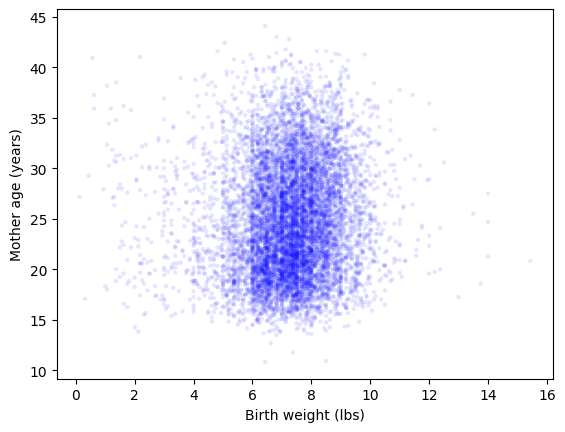

In [8]:
# Make a scatter plot of birth weight versus mother's age with specified alpha and the size of the markers
thinkplot.Scatter(weight, age, alpha=0.1, s=10)
thinkplot.Config(xlabel='Birth weight (lbs)', ylabel='Mother age (years)')

In [9]:
# Plot percentiles of birth weight versus mother’s age
# Checking the age range
max(age), min(age)

(44.08, 10.83)

In [10]:
# Arange the age based on the range and digitize the bins (assigning the bin index of the age), and group by the indices
bins = np.arange(10, 45, 2.5)
indices = np.digitize(age, bins)
groups = live.groupby(indices)

In [11]:
# Checking the variables
print(f'age data: \n{age.head(3)}')
print(f'index of the bins of the age data: {indices[:3]}')

age data: 
0    33.16
1    39.25
2    14.33
Name: agepreg, dtype: float64
index of the bins of the age data: [10 12  2]


In [12]:
# Checking the variables, continued
for i, group in groups:
    print(i, len(group))

1 3
2 55
3 550
4 1302
5 1536
6 1426
7 1267
8 1069
9 867
10 526
11 284
12 117
13 33
14 3


In [13]:
# Set up the mean age and the cdf got birth weight
mean_age = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

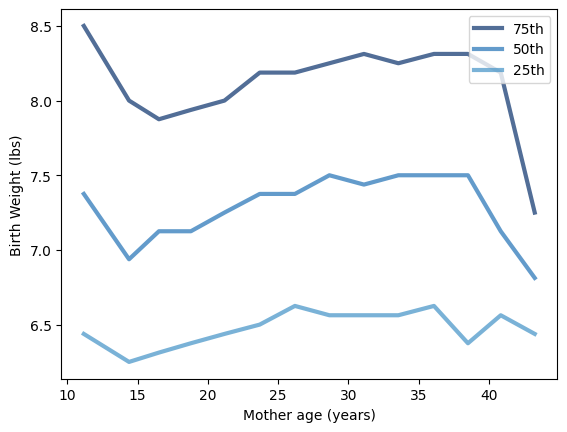

In [14]:
# Extract the 25, 50 and 75th percentile from each group
for percent in [75, 50, 25]:
    weight_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(mean_age, weight_percentiles, label=label)
    
thinkplot.Config(xlabel='Mother age (years)',
                 ylabel='Birth Weight (lbs)')

In [15]:
# Compute Pearson’s and Spearman’s correlations
print(f'Pearson\'s Correlation: {thinkstats2.Corr(age, weight)}\nSpearman\'s Correlation: {thinkstats2.SpearmanCorr(age, weight)}')

Pearson's Correlation: 0.0688339703541091
Spearman's Correlation: 0.09461004109658226


According to the visualizations and the correlation data, there's essentially no linear relationship between the mother's age and the birth weight of the babies.

## Exercise 8-1
In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

**Part 1: Use the mean and median to see if they are biased estimates of the mu**

In [19]:
# Define the mean error function
def MeanError(estimates, actual):
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

In [20]:
# Simulates experiments trying to estimate the mu of the population based on a sample with size 10 and iterations of 1000 and two estimates for each 
# sample, xbar and median, and increase the iteration numbers two times
import random

def EstimateMu(n=10, iters=1000):
    mu = 0
    sigma = 1

    estimates_xbar = []
    estimates_median = []

    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        estimates_xbar.append(xbar)
        estimates_median.append(median)

    print(f'mean error of mu estimation from xbar after {iters} iterations:', MeanError(estimates_xbar, mu))
    print(f'mean error of mu estimation from median after {iters} iterations:', MeanError(estimates_median, mu))

EstimateMu()
EstimateMu(iters=10000)
EstimateMu(iters=100000)

mean error of mu estimation from xbar after 1000 iterations: 0.002408721471465007
mean error of mu estimation from median after 1000 iterations: -0.010876781604079113
mean error of mu estimation from xbar after 10000 iterations: 0.004691779215018657
mean error of mu estimation from median after 10000 iterations: 0.007148075429845148
mean error of mu estimation from xbar after 100000 iterations: 0.000994465438523157
mean error of mu estimation from median after 100000 iterations: 0.0007272864332583628


As the number of iterations increase, the mean errors of both estimations decreases and get very close to zero, indicating both estimators are unbiased

In [22]:
# Check whether S squared or S_n-1 squared yields a loswer MSE

# First define the mean squqred error
def MSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return mse

# Simulating experiments trying to estimate the variance of the population based on a sample with size 10 and iterations of 1000 and two estimates for 
# each sample, S squared and S_n-1 squared
def EstimateSigma(n=10, iters=1000):
    mu = 0
    sigma = 1

    estimates_ssquared = []
    estimates_s1squared = []

    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        x_squared = np.var(xs)
        x1_squared = np.var(xs, ddof=1)
        estimates_ssquared.append(x_squared)
        estimates_s1squared.append(x1_squared)

    print(f'mse of variance estimation from s squared after {iters} iterations:', MSE(estimates_ssquared, sigma**2))
    print(f'mse of variance estimation from s_n-1 squared after {iters} iterations:', MSE(estimates_s1squared, sigma**2))

EstimateSigma()
EstimateSigma(iters=10000)

mse of variance estimation from s squared after 1000 iterations: 0.1917326732135413
mse of variance estimation from s_n-1 squared after 1000 iterations: 0.2251152199788723
mse of variance estimation from s squared after 10000 iterations: 0.18860373312579687
mse of variance estimation from s_n-1 squared after 10000 iterations: 0.2202581755211545


Based on the results, the mse of both estimators yield similar results, even though s sqaured yields better results for the variance estimation around the same iterations.

## Exercise 8-2
Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.

According to the documentation of the numpy.random.exponential function, the scale parameter is beta which equals the 1/lambda, so if lambda = 2, beta should be 0.5

In [26]:
# Simulate expriment drawing sample with size of 10 from exponential distribution with lambda = 2, with 1000 times of iterations
import math

def simulate_expodistr(l=0.5, n=10, iters =1000):
    estimate_xbar = []
    estimate_median = []
    for _ in range(iters):
        xs = np.random.exponential(l, n)
        xbar = 1/np.mean(xs)
        median = math.log(2)/thinkstats2.Median(xs)
        estimate_xbar.append(xbar)
        estimate_median.append(median)
    return estimate_xbar, estimate_median

lambda_estimate_xbar, lambda_estimate_median = simulate_expodistr()

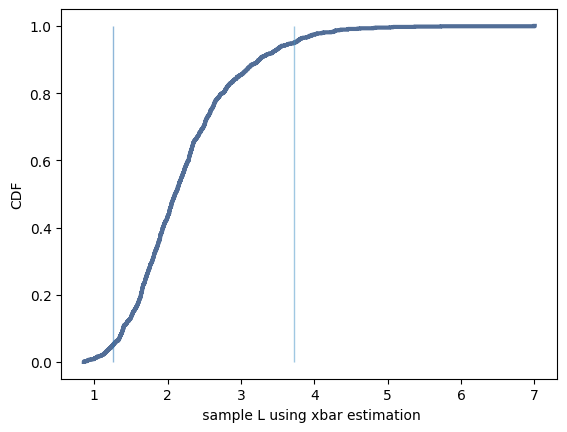

In [27]:
# Plot the sampling distribution of the estimate L using xbar estimation
cdf = thinkstats2.Cdf(lambda_estimate_xbar)
thinkplot.Cdf(cdf)
thinkplot.Vlines(cdf.ConfidenceInterval(90)[0],0,1)
thinkplot.Vlines(cdf.ConfidenceInterval(90)[1],0,1)
thinkplot.Config(xlabel=' sample L using xbar estimation', ylabel='CDF')

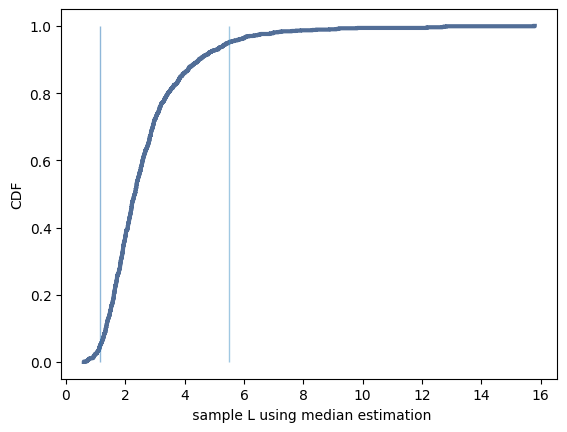

In [28]:
# Plot the sampling distribution of the estimation L using median estimation
cdf2 = thinkstats2.Cdf(lambda_estimate_median)
thinkplot.Cdf(cdf2)
thinkplot.Vlines(cdf2.ConfidenceInterval(90)[0],0,1)
thinkplot.Vlines(cdf2.ConfidenceInterval(90)[1],0,1)
thinkplot.Config(xlabel=' sample L using median estimation', ylabel='CDF')

In [29]:
# Compute the 90% confidence interval of the estimation

print(f'The 90% confidence interval is {cdf.ConfidenceInterval(90)} for estimate L using xbar estimation')
print(f'The 90% confidence interval is {cdf2.ConfidenceInterval(90)} for estimate L using median estimation')

The 90% confidence interval is (1.2585132390201017, 3.7186662055792197) for estimate L using xbar estimation
The 90% confidence interval is (1.1564751515874105, 5.483468328436738) for estimate L using median estimation


In [30]:
# Compute the standard error of the estimation

print(f'The standard error of the estimation using xbar is {np.sqrt(MSE(lambda_estimate_xbar, 2))}')
print(f'The standard error of the estimation using median is {np.sqrt(MSE(lambda_estimate_median, 2))}')

The standard error of the estimation using xbar is 0.7861980311442657
The standard error of the estimation using median is 1.7211649958876158


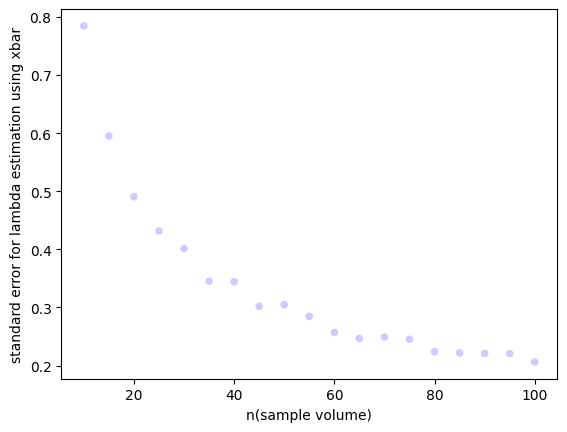

In [31]:
# Repeat the experiment with a few different values of n and make a plot of standard error versus n.
# For this question I will focus on estimating L using xbar estimation

n_list = np.arange(10,101,5)
se = []
for i in n_list:
    lambda_estimate_xbar, lambda_estimate_median = simulate_expodistr(n=i)
    se.append(np.sqrt(MSE(lambda_estimate_xbar, 2)))
thinkplot.Scatter(n_list, se)
thinkplot.Config(xlabel='n(sample volume)', ylabel='standard error for lambda estimation using xbar')

Clearly, as n increases, the standard error tends to decrease at diminishing rate